# Part 8 - Face Detection

- In this notebook, we will explore face detection using `Haar Cascades`, which is key component of the `Viola-Jones` object detection frameowrk.
- Keep in mind, this is face detection NOT face recognition.
- We will be able to very quickly detect if a face is in an image and locate it.
- However we won't know who's face it belongs to.
- We would need a really large dataset and deep learning for facial recognition.
- In 2001 Paul Viola and Michael Jones published their method of face detection based on the simple concept of a few key features.
- They also came up with the idea of pre-computing and integral image to save time on calculations.
- Lets first understand the main feature types that Viola and Jones proposed.
- The main feature types are:
    - **Edge Features**
    - **Line Features**
    - **Four-rectangle Features** (4th option in the image)
    
![Main Features Types of Face Detection](https://cnx.org/resources/2dbd802dce2c14cd6766c5db6f522a946a66c374/graphics1.jpg)

- Each feature is a single value obtained by subtracting sum of pixels under white rectangle from sum of pixels under black rectangle.
- Realistically, our images won't be perfect edges or lines.
- **These features are calculated by:**
    - mean(dark region) - mean (light region)
- The closer the result is to 1, the better the feature.
    
![Calculation Feature 1](./images/image-1.jpeg)

- sum([0.8, 1, 0.7, 0.8, 0.8, 0.8, 0.8, 0.8]) = 6.5
- sum([0, 0.1, 0.3, 0.1, 0.1, 0.2, 0.2, 0.2]) = 1.2
- Mean = 6.5 / 8 = 0.8125
- mean = 1.2 / 8 = 0.15
- Delta = 0.8125 - 0.15 = 0.6625
- Claculating these sums for the entire image would be very computationally expensive.
- The Viola-Jones algorithm solves this by using the integral image.
- Resulting in an O(1) running time of the algorithm.
- An integral image is also known as a summed area table.

![Integram Image example](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1545248701/20_j8vdir.png)

- To sum up a subrectabgle of its values; each colored spot highlights the sum inside the rectangle of that color.
- The algorithm also saves time by going through a cascade of classifiers.
- This means we will treat the image to a series (a cascade) of classifiers based on the simple features shown earlier.
- Once an image fails a classifier, we can stop attempting to detect a face.
- A common misconception behind face detection with this algorithm is that the algorithm slowly "scans" the entire image looking for a face.
- This would be very inefficient, instead we pass the cascade of classifiers.
- First we need a front facing image of a person's face.
- Then turn it to gray scale.
- Then we will begin the search for haar Cascade Features.
- One of the very first features searched for is an edge feature indicating eyes and cheeks.
- If the image were to fail for the search of this feature, we can quickly say there is no face.
- If it passed, then we search for the next feature, such as the bridge of the nose.
- We continue through this cascade (which can be thousands of features).
- Until the algorithm detects the face.
- Theoretically this approach can be used for a variety of objects or detections.
- For example we'll also work with a pre-trained eye detector.
- The downside to this algorithm is the very large data sets needed to create your own features.
- However, luckily many pre-trained sets of features already exists.
- OpenCV comes with pre-trained xml files of various [Haar cascades](https://github.com/opencv/opencv/tree/master/data/haarcascades).
- In the Deep Learning sections of the course, we will see how to create our own classification algorithms for any distinct groups of images (e.g. cats vs dogs).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

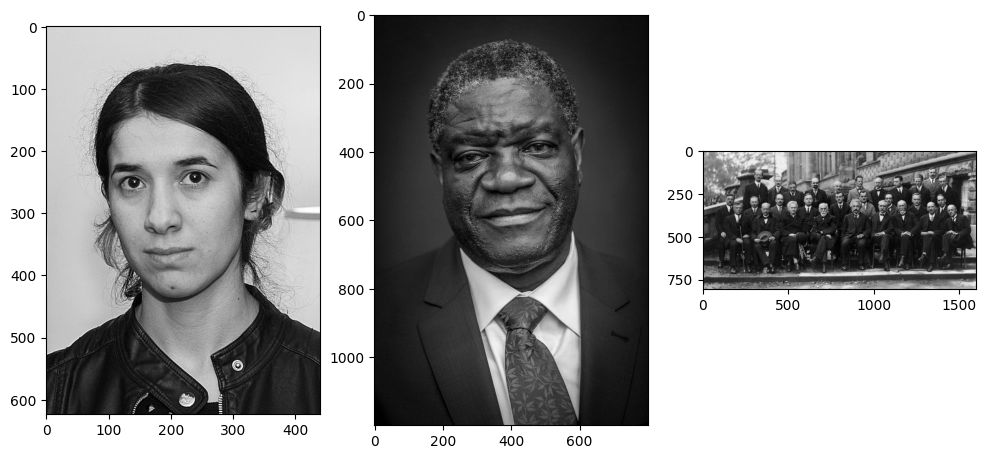

In [2]:
nadia = cv2.imread("../DATA/Nadia_Murad.jpg", cv2.IMREAD_GRAYSCALE)
denis = cv2.imread("../DATA/Denis_Mukwege.jpg", cv2.IMREAD_GRAYSCALE)
solvay = cv2.imread("../DATA/solvay_conference.jpg", cv2.IMREAD_GRAYSCALE)

fig, axs = plt.subplots(1, 3, figsize=(12, 10))
axs[0].imshow(nadia, cmap="gray")
axs[1].imshow(denis, cmap="gray")
axs[2].imshow(solvay, cmap="gray")

plt.show()

In [37]:
# load the pretrained model using OpenCV
face_cascade = cv2.CascadeClassifier("../DATA/haarcascades/haarcascade_frontalface_default.xml")
eye_cascade  = cv2.CascadeClassifier("../DATA/haarcascades/haarcascade_eye.xml")


# detect face(s) and draw rectangle(s) around that
def detect_face(img: np.array, face=1, eye=0) -> np.array:
    face_img = img.copy()
    color = (0, 0, 255) if len(face_img.shape) == 3 else (255, 255, 255)
    
    if face == 1 and eye == 0:
        # will detect the face and return the rectangle position around the face
        face_rects = face_cascade.detectMultiScale(face_img)

        for (x, y, w, h) in face_rects:
            
            cv2.rectangle(face_img, pt1=(x,y), pt2=(x+w, y+h), color=color, thickness=5)
            
    elif eye == 1 and face == 0:
        eye_rects = eye_cascade.detectMultiScale(face_img)

        for (x, y, w, h) in eye_rects:
            cv2.rectangle(face_img, pt1=(x,y), pt2=(x+w, y+h), color=color, thickness=3)
    
    else:
        raise Exception("Pass which type of detection required!")
        
    return face_img


def adj_detect_face(img, scaleFactor: float=1.2, minNeighbors: int=5) -> np.array:
    face_img = img.copy()
    # will detect the face and return the rectangle position around the face
    face_rects = face_cascade.detectMultiScale(face_img, scaleFactor=scaleFactor, minNeighbors=minNeighbors)
    
    for (x, y, w, h) in face_rects:
        cv2.rectangle(face_img, pt1=(x,y), pt2=(x+w, y+h), color=(255, 255, 255), thickness=3)
    return face_img

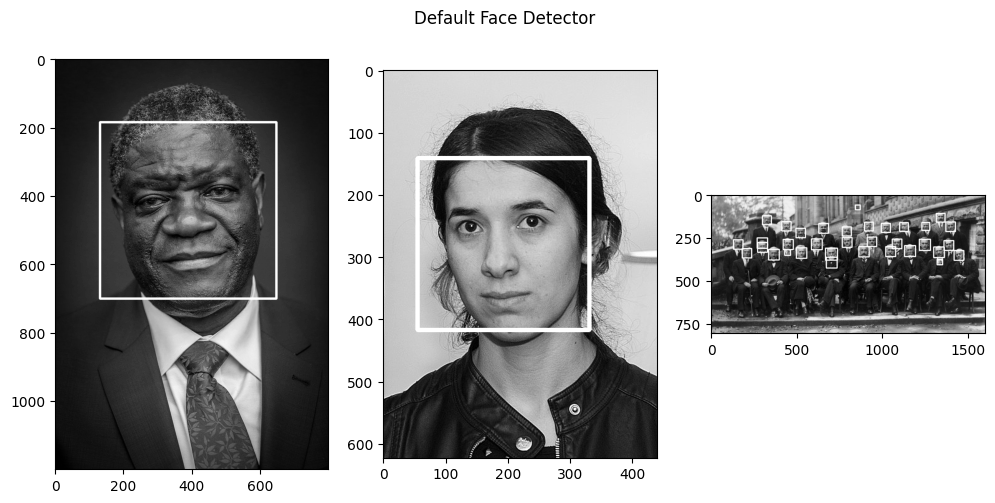

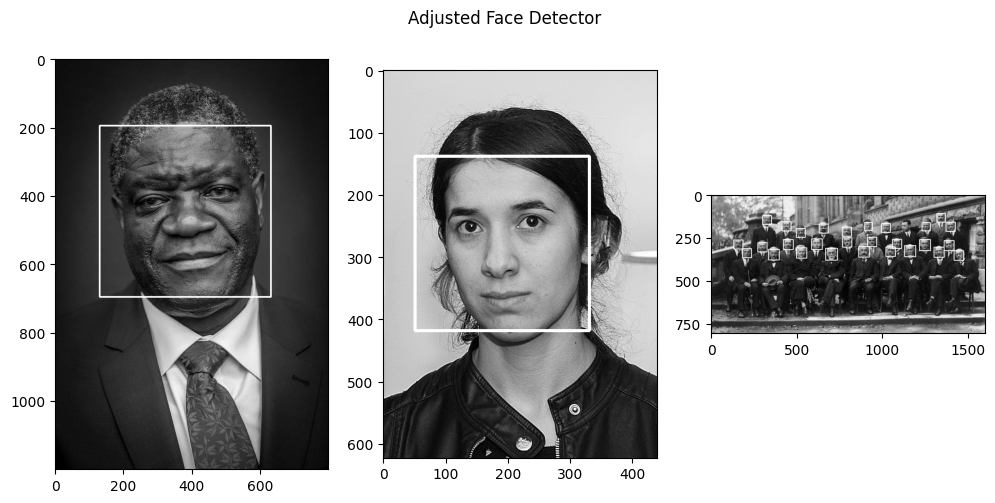

In [38]:
result_denis = detect_face(denis, eye=0)
result_nadia = detect_face(nadia, eye=0)
result_solvay = detect_face(solvay, eye=0)

adj_result_denis = adj_detect_face(denis)
adj_result_nadia = adj_detect_face(nadia)
adj_result_solvay = adj_detect_face(solvay)

fig, axs = plt.subplots(1, 3, figsize = (12, 10))
axs[0].imshow(result_denis, cmap="gray")
axs[1].imshow(result_nadia, cmap="gray")
axs[2].imshow(result_solvay, cmap="gray")
plt.suptitle("Default Face Detector", y=0.75)
plt.show()


## Can see the improvements on the 3rd Solvay image ##
fig, axs = plt.subplots(1, 3, figsize = (12, 10))
axs[0].imshow(adj_result_denis, cmap="gray")
axs[1].imshow(adj_result_nadia, cmap="gray")
axs[2].imshow(adj_result_solvay, cmap="gray")
plt.suptitle("Adjusted Face Detector", y=0.75)
plt.show()

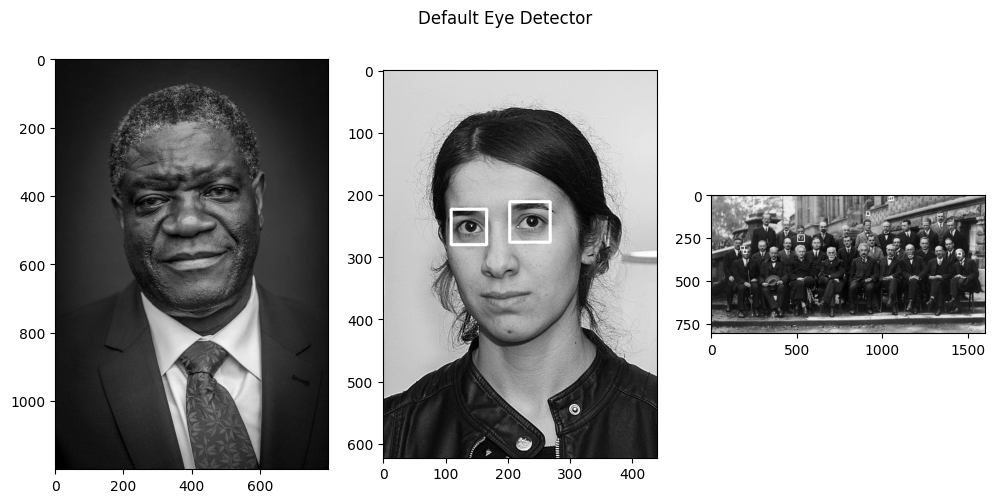

In [39]:
result_denis = detect_face(denis, face=0, eye=1)
result_nadia = detect_face(nadia, face=0, eye=1)
result_solvay = detect_face(solvay, face=0, eye=1)

fig, axs = plt.subplots(1, 3, figsize = (12, 10))
axs[0].imshow(result_denis, cmap="gray")
axs[1].imshow(result_nadia, cmap="gray")
axs[2].imshow(result_solvay, cmap="gray")
plt.suptitle("Default Eye Detector", y=0.75)
plt.show()

In [40]:
# working with video
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    
    frame = detect_face(frame, eye=0, face=1)
    
    cv2.imshow("Video Face Detect", frame)
    
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break
        
cap.release()
cv2.destroyAllWindows()